# Exploratory Analysis of The I-94 Traffic Dataset
##### Prepared by Katlego Thobye

This in an exploratory data visualization project about westbound traffic on the I-94 Intserstate highway. The goal of this notebook is to determine a few indicators of heavy traffic on the I-94 based on `Metro Interstate Traffic Volume` dataset.  

"Interstate 94 (I-94) is an east–west Interstate Highway connecting the Great Lakes and northern Great Plains regions of the United States. Its western terminus is just east of Billings, Montana, at a junction with I-90; its eastern terminus is in Port Huron, Michigan, where it meets with I-69 and crosses the Blue Water Bridge into Sarnia, Ontario, Canada, where the route becomes Ontario Highway 402. It thus lies along the primary overland route from Seattle (via I-90) to Toronto (via Ontario Highway 401) and is the only east–west Interstate Highway to have a direct connection to Canada." - [Wikipedia](https://en.wikipedia.org/wiki/Interstate_94)

To extract insigts the following methods will be employed:
- Visualization of time series data with line plots.
- Visualization of correlations with scatter plots.
- Visualization of frequency distributions with bar plots and histograms.
- Speeding up of the exploratory data visualization workflow using the pandas library.
- Comparing graphs using grid charts.

Pandas, Pyplot from Matplotlib and Seaborn will be used as extension libraries and modules for this project.  

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt


In [2]:
i94_traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
i94_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


To get a better understanding of the traffic volume pattern a histogram of is plotted that shows the amount of hours that traffic volume has fallen within a certain range or bin. 

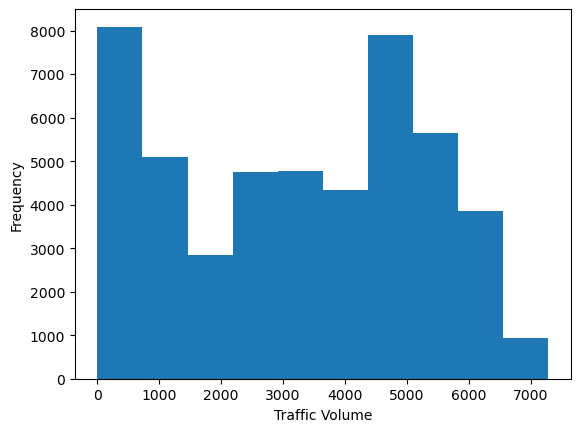

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [3]:
%matplotlib inline
plt.hist(i94_traffic['traffic_volume'])
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()
i94_traffic['traffic_volume'].describe()

In [4]:
#transforming the date_time column to datetime object datatype format
i94_traffic['date_time'] = pd.to_datetime(i94_traffic['date_time'])

In [5]:
#using Series.dt.hour to get the hour of every instance of the date_time column
date_time_hr = i94_traffic['date_time'].dt.hour

Below, a new ategorical column is added to the dataset that separates the dataset into 'day' and 'night' entries. 
- values between 7am and 7pm fall under day
- values between 7pm and 7am fall under night

In [6]:
i94_traffic['day_night'] = ['day' if all([hour >=7, hour <19]) else 'night' for hour in date_time_hr]
i94_traffic['day_night']

0          day
1          day
2          day
3          day
4          day
         ...  
48199    night
48200    night
48201    night
48202    night
48203    night
Name: day_night, Length: 48204, dtype: object

Using the above created column, the datset is split into two distinct datasets by the night and day category.

In [7]:
# creating a datframe of all day values
day = i94_traffic[i94_traffic['day_night'] == 'day'].copy()
day_traffic_vol = day['traffic_volume']
day_traffic_vol.describe()


count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [8]:
# creating a dataframe of all night values
night = i94_traffic[i94_traffic['day_night'] == 'night'].copy()
night_traffic_vol = night['traffic_volume']
night_traffic_vol.describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

A separate histogram is plotted for each one of the above created categories. 

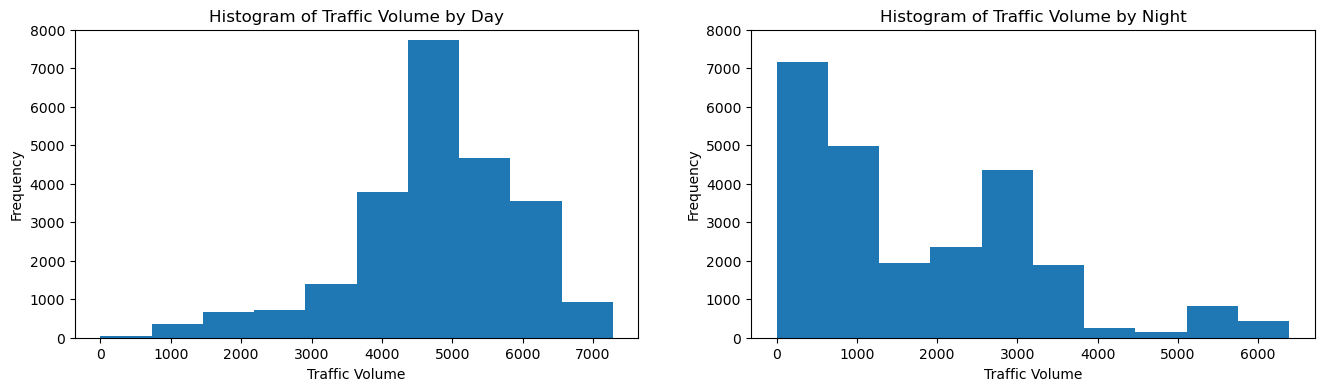

In [9]:
#plotting a histogram for the 'day' and 'night' values

plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
plt.title('Histogram of Traffic Volume by Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')
plt.hist(day_traffic_vol)
plt.ylim([0,8000])

plt.subplot(1,2,2)
plt.title('Histogram of Traffic Volume by Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')
plt.hist(night_traffic_vol)
plt.ylim([0,8000])

plt.show()

In [10]:
day.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,day_night
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,day
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,day
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,day
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,day
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,day


A new month column is created for each of the new day and night datasets. The average volulme for each month is stored as a dataframe in the `avg_day_volume` and `avg_night_volume` for the day and night datestes respectively. 

In [21]:
# creating a new column called month that numerically describes the month in which the data was taken
day['month'] = day['date_time'].dt.month
day_vol_by_month = day.groupby('month')
avg_day_volume = day_vol_by_month['traffic_volume'].mean()


In [20]:
night['month'] = night['date_time'].dt.month
night_vol_by_month = night.groupby('month')
avg_night_volume = night_vol_by_month['traffic_volume'].mean()


The mean monthly traffic volume is plotted for the day and night data.  

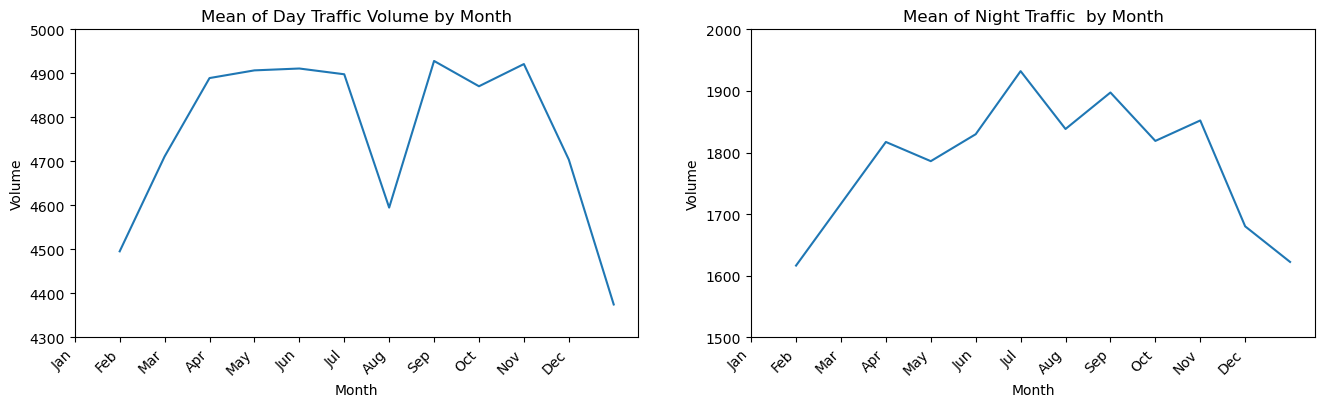

In [13]:
mon_list = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"] 
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
plt.plot(avg_day_volume)
plt.title('Mean of Day Traffic Volume by Month')
plt.ylabel('Volume')
plt.xlabel('Month')
plt.xticks(ticks=np.arange(12), labels=mon_list, rotation=45, ha='right', fontsize=10)
plt.ylim([4300,5000])

plt.subplot(1,2,2)
plt.plot(avg_night_volume)
plt.title('Mean of Night Traffic  by Month')
plt.ylabel('Volume')
plt.xlabel('Month')
plt.xticks(ticks=np.arange(12), labels=mon_list, rotation=45, ha='right', fontsize=10)
plt.ylim([1500,2000])
plt.show()


In [22]:
day['dayofweek'] = day['date_time'].dt.dayofweek
vol_by_weekday = day.groupby('dayofweek')
avg_weekday_vol = vol_by_weekday['traffic_volume'].mean()  # 0 is Monday, 6 is Sunday

In [15]:
night['dayofweek'] = night['date_time'].dt.dayofweek
vol_by_weeknight = night.groupby('dayofweek')
avg_weeknight_vol = vol_by_weeknight['traffic_volume'].mean()  # 0 is Monday, 6 is Sunday

Two line plot to visualizes the mean monthly day and night volumes from above are created below.  

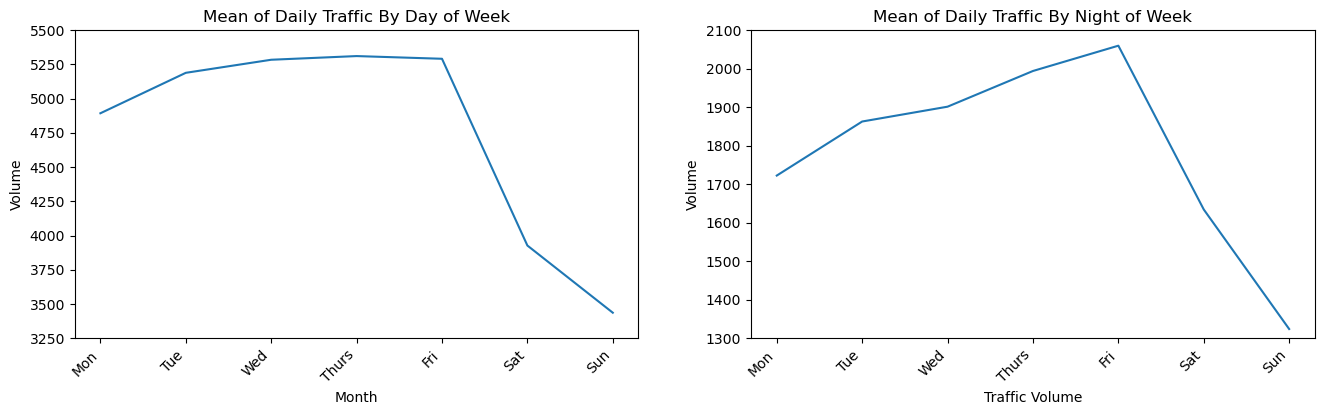

In [67]:
day_list = ["Mon", "Tue", "Wed", "Thurs", "Fri", "Sat", "Sun"] 
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
plt.plot(avg_weekday_vol)
plt.title('Mean of Daily Traffic By Day of Week')
plt.ylabel('Volume')
plt.xlabel('Month')
plt.xticks(ticks=np.arange(7), labels=day_list, rotation=45, ha='right', fontsize=10)
plt.ylim([3250,5500])

plt.subplot(1,2,2)
plt.plot(avg_weeknight_vol)
plt.title('Mean of Daily Traffic By Night of Week')
plt.ylabel('Volume')
plt.xlabel('Traffic Volume')
plt.xticks(ticks=np.arange(7), labels=day_list, rotation=45, ha='right', fontsize=10)
plt.ylim([1300,2100])
plt.show()

The `day` datastet is further separated for analysis into `business days` (Monday to Friday) and `weekends` (Saturday and Sunday). 

In [24]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
business_vol_by_hour = bussiness_days.groupby('hour')['traffic_volume'].mean()
weekend_vol_by_hour = weekend.groupby('hour')['traffic_volume'].mean()

The `business day` and `weekend` mean volumes by hour are plotted below. 

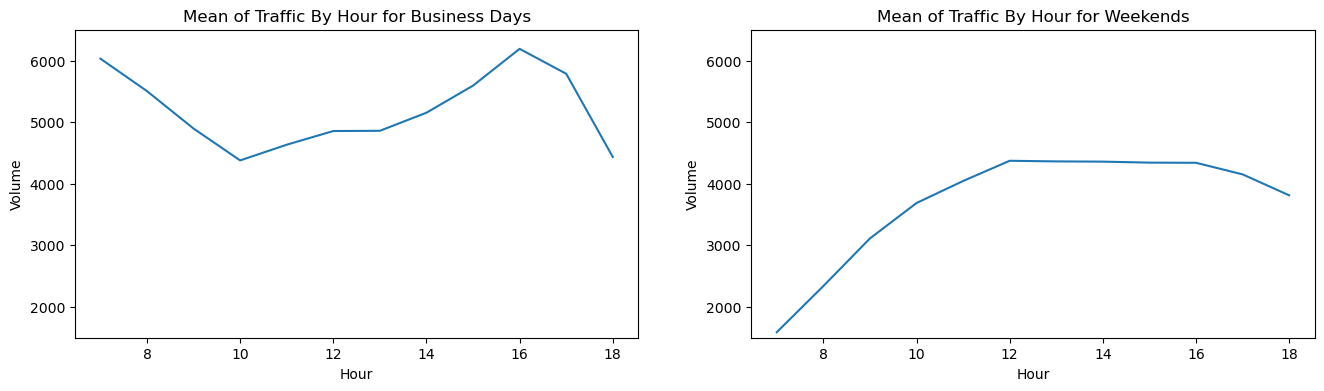

In [25]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
plt.plot(business_vol_by_hour)
plt.title('Mean of Traffic By Hour for Business Days')
plt.ylabel('Volume')
plt.xlabel('Hour')
plt.ylim([1500,6500])

plt.subplot(1,2,2)
plt.plot(weekend_vol_by_hour)
plt.title('Mean of Traffic By Hour for Weekends')
plt.ylabel('Volume')
plt.xlabel('Hour')
plt.ylim([1500,6500])

plt.show()


## Interpretation

There is on average about 1.5 times more traffic on business days than there is on weekends, during day time hours. The early morning rush of the weekday has, on average three times more volume than the same period on weekends. Weekend traffic peeks artound midday at a volume of about 4500. Weekday traffic peaks in the morning at around 7am and again in the evening at around 4pm. This very likely corresponds with times of commute to and from work. 

In [27]:
i94_traffic.corr('pearson', numeric_only=True)['traffic_volume']

temp              0.130299
rain_1h           0.004714
snow_1h           0.000733
clouds_all        0.067054
traffic_volume    1.000000
Name: traffic_volume, dtype: float64

## Weather Related Factors

Traffic volume seems to rise as air temperature rises. The air temperature seems to be measured in Kelvin, due to the very high recorded value that range mostly between around 250 and 300 units. 

The minimum value of 0 seems seem like erraneous entries and should be cleanded from the data and possibly replaced with an average value. 

In [54]:
day['temp'].min()

0.0

The maximum temperature of 310°K is equal to about 98°F or 36°C which seems likely and reasonable for a maximum day temperatur for the northern region of the USA through which the I-94 runs. 

In [55]:
day['temp'].max()

310.07

In [56]:
day['temp'].mean()

282.2575957616116

In [57]:
day['temp'].mode()

0    274.15
Name: temp, dtype: float64

In [58]:
day['temp'].median()

283.78

A scatter plot of `Air Temperature` vs `Traffic Volumne` without outliers being exclude.

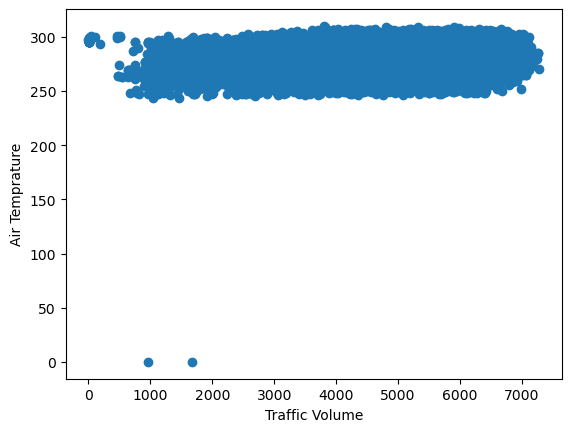

In [28]:
plt.scatter(day['traffic_volume'], day['temp'])
plt.xlabel('Traffic Volume')
plt.ylabel('Air Temprature')
plt.show()


A scatter plot of `Air Temperature` vs `Traffic Volumne` with outliers being exclude.

In [59]:
day['temp'] = day['temp'].replace(0, day['temp'].mean())

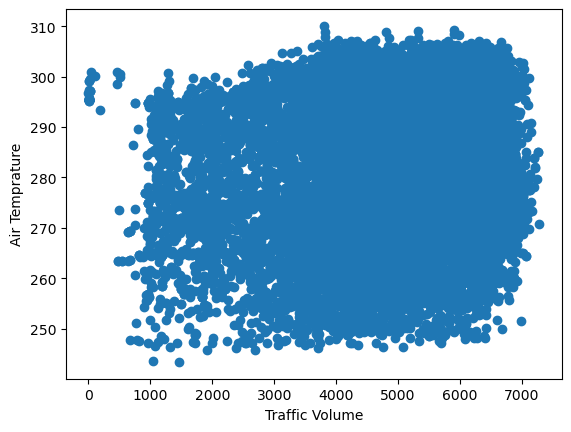

In [60]:
plt.scatter(day['traffic_volume'], day['temp'])
plt.xlabel('Traffic Volume')
plt.ylabel('Air Temprature')
plt.show()

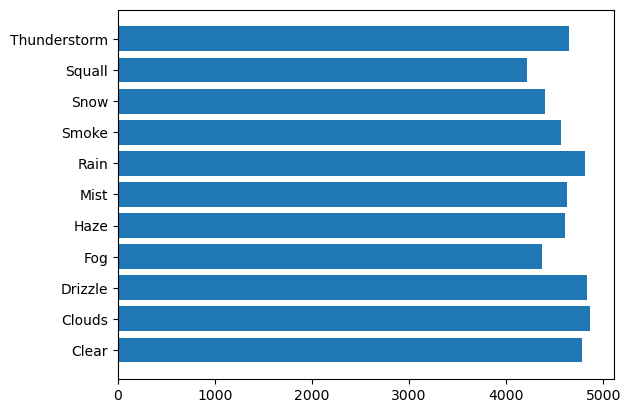

In [53]:
by_weather_main = day.groupby('weather_main')
avg_vol_by_weather = by_weather_main['traffic_volume'].mean()
plt.barh(avg_vol_by_weather.index, avg_vol_by_weather)
plt.show()

In [62]:
vol_by_weather_description = day.groupby('weather_description')
avg_vol_by_weather_description = vol_by_weather_description['traffic_volume'].mean()

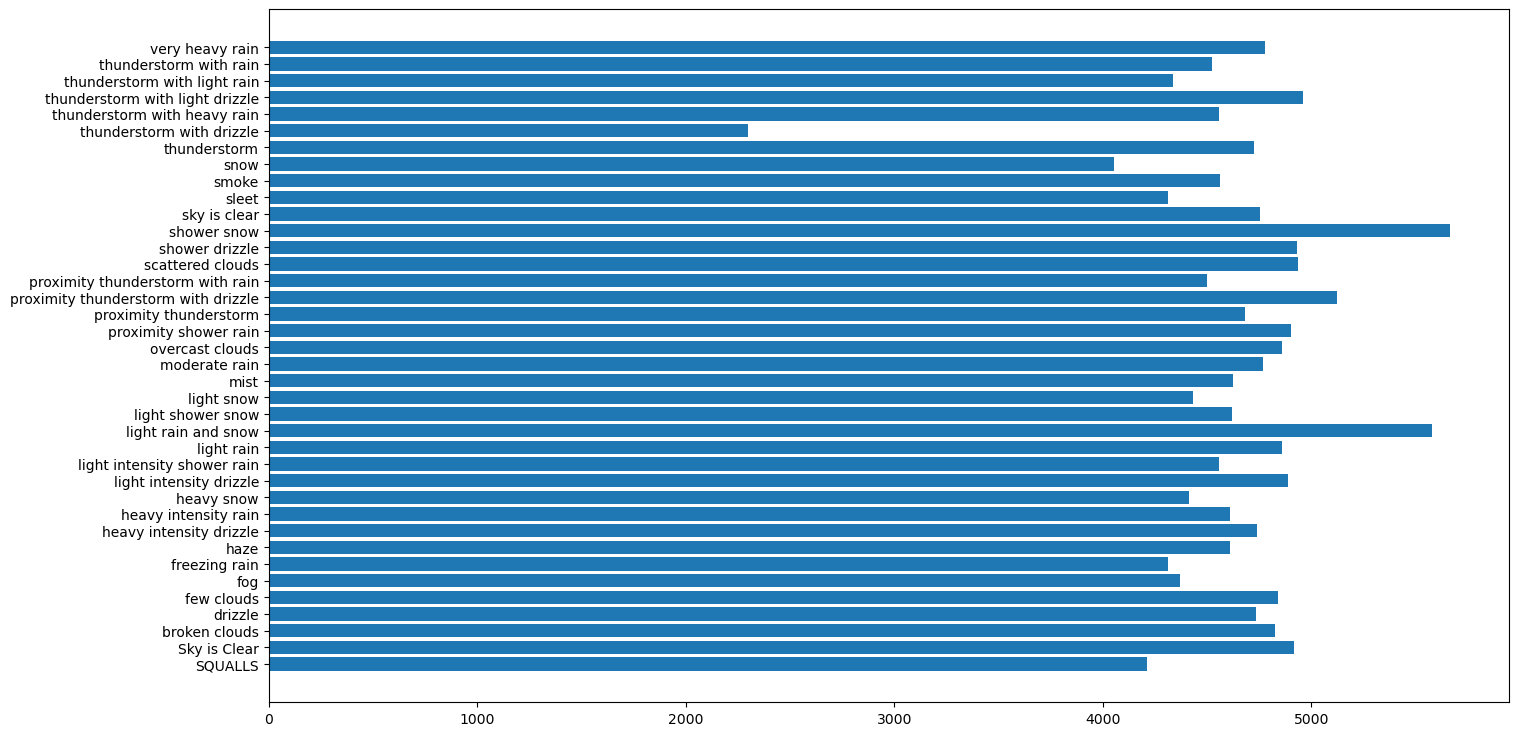

In [52]:
plt.figure(figsize=(16, 9))
plt.barh(avg_vol_by_weather_description.index, avg_vol_by_weather_description)
plt.show()

The weather types of `light rain and snow` as well as  `shower snow` have the highest recorded average volumes and the only volumes significantly higher than 5000. Therefore these weather types could be considered as heavy traffic indicators. The main reason for high volumes of traffic seems work related commuting. The business day traffic rush spiking at 7am and 4pm could be regarded as the main indicator of heavy traffic on the I94 Interstate highway as these periods on average, on a daily basis have even higher volumes than any weather related patterns observed. 

## Conclusion


Businessday commute patterns and weather factors both have an impact on traffic volumes. On average, raffic volume is highest particularly during the business day peak traffic times of around 7am in the morning and 4pm in the afternoon / early evening as well as during periods exhibiting light rain and snow or shower snow type weather conditionbs. Traffic volume also seems positively correlated with temperature, although the correlation is very weak.

Further evidence for business day commmute being the highest indiator for traffic volume is the significat drop in traffic volume during the month of July. During the month of July a few things occure that could cause significant drops in traffic volumes across the I-94 highway.

*School vacations:*
- Many schools in the United States start their summer vacation in July, which means that there are fewer people traveling for work or school. This can lead to a decrease in traffic on major highways, such as I-94.

*Summer weather:*

- The weather in July is typically hot and humid in many parts of the United States, which can discourage people from driving. This is especially true in areas where there is a high risk of thunderstorms or hurricanes.

*Summer activities:*
- Many people choose to spend their summers outdoors, participating in activities such as swimming, hiking, and camping. This can lead to a decrease in traffic on highways, as people are less likely to drive when they can easily reach their destination by other means.